# Homework 03 of EPS 88

## Learning from a bigger classification of basalt source

In the 2006 paper

>Vermeesch, P. (2006). Tectonic discrimination of basalts with classification trees. Geochimica et Cosmochimica Acta, 70, 1839-1848. https://doi.org/10.1016/j.gca.2005.12.016

Vermeesch wrote:

> *"If a much larger database were compiled, the trees would grow and their discriminative power increase, but they would still be easy to interpret"*

In a more recent paper, Doucet et al. compiled many more data. Rather than 756 basalt data points, they compiled 29,407 of which 22,005 correspond to the categories of Vermeesch (2006).

> Doucet, L. S., Tetley, M. G., Li, Z.-X., Liu, Y., & Gamaleldien, H. (2022). Geochemical fingerprinting of continental and oceanic basalts: A machine learning approach. Earth-Science Reviews, 233, https://doi.org/10.1016/j.earscirev.2022.104192

Your task in this assignment is use the data of Doucet et al. (2022) to evaluate whether the predictive power of the classification tree approach increases within this increase in data size as predicted by Vermeesch (2006).

## Import scientific Python libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



## Import data

We will import the data from Doucet et al. 2022 that is provided as their supplemental table 1.

For comparison, we will also import the data from Vermeesch (2006).

In [4]:
## Read Doucet et al. 2022 data
Doucet_data = pd.read_csv('../data/Doucet2022.csv',header=11)

## Read Vermeesch (2006) data
Vermeesch_data = pd.read_csv('../data/Vermeesch2006.csv')

## The first task for data science is to inspect the data

As we have two dataframes, if we want to develop a machine learning model that can be applied to both datasets, we need to make sure that the column names (feature names) are the same.

Let's first inspect the column names of the two dataframes. If they are different, we need to make them the same.


In [5]:
## print the column names
print(Doucet_data.columns)
print(Vermeesch_data.columns)

Index(['X1', 'type', 'location', 'SiO2', 'TiO2', 'Al2O3', 'MgO', 'Fe2O3',
       'FeO', 'FeOt', 'MgO.1', 'MnO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'NiO',
       'Li', 'Be', 'B', 'Ti', 'Ni', 'V', 'Cu', 'Zn', 'Cr', 'Li.1', 'Rb', 'Sr',
       'Y', 'Zr', 'Nb', 'Mo', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu',
       'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Pb', 'Th',
       'U'],
      dtype='object')
Index(['affinity', 'SiO2_wt_percent', 'TiO2_wt_percent', 'Al2O3_wt_percent',
       'Fe2O3_wt_percent', 'FeO_wt_percent', 'CaO_wt_percent',
       'MgO_wt_percent', 'MnO_wt_percent', 'K2O_wt_percent', 'Na2O_wt_percent',
       'P2O5(wt%)', 'La_ppm', 'Ce_ppm', 'Pr_ppm', 'Nd_ppm', 'Sm_ppm', 'Eu_ppm',
       'Gd_ppm', 'Tb_ppm', 'Dy_ppm', 'Ho_ppm', 'Er_ppm', 'Tm_ppm', 'Yb_ppm',
       'Lu_ppm', 'Sc_ppm', 'V_ppm', 'Cr_ppm', 'Co_ppm', 'Ni_ppm', 'Cu_ppm',
       'Zn_ppm', 'Ga_ppm', 'Rb_ppm', 'Sr_ppm', 'Y_ppm', 'Zr_ppm', 'Nb_ppm',
       'Sn_ppm', 'Cs_ppm', 'Ba_ppm', 'Hf_ppm', 'Ta_

We can see that the column names are different. We need to make them the same.

There are multiple ways for data cleaning. Here we will use the following steps:

1. Rename the 'affinity' column to 'type' in the Vermeesch dataframe to match the column name in the Doucet dataframe
2. Remove the units from the column names
3. Keep only the columns that are present in both dataframes


In [6]:
## rename type to affinity for Doucet data
Vermeesch_data.rename(columns={'affinity':'type'},inplace=True)
print(Vermeesch_data.columns)

Index(['type', 'SiO2_wt_percent', 'TiO2_wt_percent', 'Al2O3_wt_percent',
       'Fe2O3_wt_percent', 'FeO_wt_percent', 'CaO_wt_percent',
       'MgO_wt_percent', 'MnO_wt_percent', 'K2O_wt_percent', 'Na2O_wt_percent',
       'P2O5(wt%)', 'La_ppm', 'Ce_ppm', 'Pr_ppm', 'Nd_ppm', 'Sm_ppm', 'Eu_ppm',
       'Gd_ppm', 'Tb_ppm', 'Dy_ppm', 'Ho_ppm', 'Er_ppm', 'Tm_ppm', 'Yb_ppm',
       'Lu_ppm', 'Sc_ppm', 'V_ppm', 'Cr_ppm', 'Co_ppm', 'Ni_ppm', 'Cu_ppm',
       'Zn_ppm', 'Ga_ppm', 'Rb_ppm', 'Sr_ppm', 'Y_ppm', 'Zr_ppm', 'Nb_ppm',
       'Sn_ppm', 'Cs_ppm', 'Ba_ppm', 'Hf_ppm', 'Ta_ppm', 'Pb_ppm', 'Th_ppm',
       'U_ppm', '143Nd/144Nd', '87Sr/86Sr', '206Pb/204Pb', '207Pb/204Pb',
       '208Pb/204Pb'],
      dtype='object')


In [7]:
## remove _ppm from the column names
Doucet_data.columns = Doucet_data.columns.str.replace('_ppm', '')
Vermeesch_data.columns = Vermeesch_data.columns.str.replace('_ppm', '')

## remove _wt_percent from the column names
Doucet_data.columns = Doucet_data.columns.str.replace('_wt_percent', '')
Vermeesch_data.columns = Vermeesch_data.columns.str.replace('_wt_percent', '')

print(Doucet_data.columns)
print(Vermeesch_data.columns)

Index(['X1', 'type', 'location', 'SiO2', 'TiO2', 'Al2O3', 'MgO', 'Fe2O3',
       'FeO', 'FeOt', 'MgO.1', 'MnO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'NiO',
       'Li', 'Be', 'B', 'Ti', 'Ni', 'V', 'Cu', 'Zn', 'Cr', 'Li.1', 'Rb', 'Sr',
       'Y', 'Zr', 'Nb', 'Mo', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu',
       'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Pb', 'Th',
       'U'],
      dtype='object')
Index(['type', 'SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'FeO', 'CaO', 'MgO', 'MnO',
       'K2O', 'Na2O', 'P2O5(wt%)', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd',
       'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Sc', 'V', 'Cr', 'Co', 'Ni',
       'Cu', 'Zn', 'Ga', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Sn', 'Cs', 'Ba', 'Hf',
       'Ta', 'Pb', 'Th', 'U', '143Nd/144Nd', '87Sr/86Sr', '206Pb/204Pb',
       '207Pb/204Pb', '208Pb/204Pb'],
      dtype='object')


In [8]:
## keep common columns between Doucet and Vermeesch data
common_columns = list(set(Doucet_data.columns) & set(Vermeesch_data.columns))

Doucet_data = Doucet_data[common_columns]
Vermeesch_data = Vermeesch_data[common_columns]

print(Doucet_data.columns)
print(Vermeesch_data.columns)

Index(['Eu', 'K2O', 'Pb', 'MgO', 'SiO2', 'MnO', 'Rb', 'Nb', 'Cr', 'Lu', 'Y',
       'La', 'CaO', 'Tm', 'Tb', 'Yb', 'Nd', 'TiO2', 'Cs', 'V', 'U', 'Fe2O3',
       'Ce', 'Gd', 'Ni', 'Zn', 'Sr', 'Hf', 'Na2O', 'Zr', 'Pr', 'type', 'Th',
       'FeO', 'Dy', 'Cu', 'Al2O3', 'Ho', 'Er', 'Ta', 'Sm', 'Ba'],
      dtype='object')
Index(['Eu', 'K2O', 'Pb', 'MgO', 'SiO2', 'MnO', 'Rb', 'Nb', 'Cr', 'Lu', 'Y',
       'La', 'CaO', 'Tm', 'Tb', 'Yb', 'Nd', 'TiO2', 'Cs', 'V', 'U', 'Fe2O3',
       'Ce', 'Gd', 'Ni', 'Zn', 'Sr', 'Hf', 'Na2O', 'Zr', 'Pr', 'type', 'Th',
       'FeO', 'Dy', 'Cu', 'Al2O3', 'Ho', 'Er', 'Ta', 'Sm', 'Ba'],
      dtype='object')


Note that here we simply keep the common columns between the two dataframes, which loss some information. 
If you want to keep all the information, you could further explore how to rename the columns in a way that can be used for both dataframes.

The Doucet et al. 2022 study includes data from additional basalt types. To test Vermeesch's hypothesis, let's filter the data to be those from:

- ***Island arc basalts (IAB)*** *In the Doucet et al. dataset these are called `ARC-O` standing for oceanic arc.*
- ***Mid-ocean ridge (MORB)***
- ***Ocean-island (OIB)***

The code below filters to these types and creates a new dataframe

In [9]:
## Filter the data 
Doucet_data = Doucet_data[(Doucet_data['type']=='MORB') | (Doucet_data['type']=='OIB') | (Doucet_data['type']=='ARC-O')].reset_index(drop=True)
Doucet_data.head()

## To make the column names consistent with Vermeesch (2006), let's rename the type names "ARC-O" to "IAB"
Doucet_data.loc[Doucet_data['type']=='ARC-O','type'] = 'IAB'
Doucet_data.head()


,Eu,K2O,Pb,MgO,SiO2,MnO,Rb,Nb,Cr,Lu,...,Th,FeO,Dy,Cu,Al2O3,Ho,Er,Ta,Sm,Ba
0,NaN,0.28,NaN,9.76,52.80,0.16,4.7,0.20,244.0,NaN,...,NaN,NaN,NaN,19.0,13.68,NaN,NaN,NaN,NaN,4.0
1,NaN,0.26,NaN,9.41,52.07,0.19,4.1,0.00,260.0,NaN,...,NaN,NaN,NaN,112.0,14.46,NaN,NaN,NaN,NaN,45.0
2,0.47,0.26,0.54,8.56,52.84,0.16,2.8,0.13,167.0,0.23,...,0.14,NaN,2.36,58.0,14.85,NaN,1.48,NaN,1.28,37.0
3,NaN,0.32,NaN,8.80,52.87,0.15,4.2,0.10,200.0,NaN,...,NaN,NaN,NaN,97.0,14.80,NaN,NaN,NaN,NaN,55.0
4,0.52,0.28,0.21,9.26,52.58,0.17,4.8,0.20,275.0,1.25,...,0.16,NaN,2.49,88.0,14.63,NaN,1.58,NaN,1.36,45.0


## Data preprocessing

- Encode the target variable 'type' using LabelEncoder
- Split the data into features (X) and target (y)
- Impute missing values using median imputation
- Split the data into training and testing sets


In [10]:
## Encode the target variable 'type' using LabelEncoder
le = LabelEncoder()
le.fit(Doucet_data['type'])

## Split the data into features (X) and target (y)
X = Doucet_data.drop('type',axis=1)
X_columns = X.columns ## save the column names
y = Doucet_data['type']
y = le.transform(y)

## Impute missing values using median imputation
imputer = SimpleImputer(strategy='median')
imputer.fit(X)
X = imputer.transform(X)   

## Split the data into training and testing sets. Use 30% of the data as the testing set. Set random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Let's check the shape of the training and testing sets
print(f"{X_train.shape = }")
print(f"{X_test.shape = }")


X_train.shape = (15403, 41)
X_test.shape = (6602, 41)


## Build a logistic regression classifier

Review the previous lectures on logistic regression and how to build a logistic regression classifier using `sklearn`.

Try to build a logistic regression classifier and evaluate its accuracy using Doucet et al. (2022) data.


accuracy = 0.947440169645562


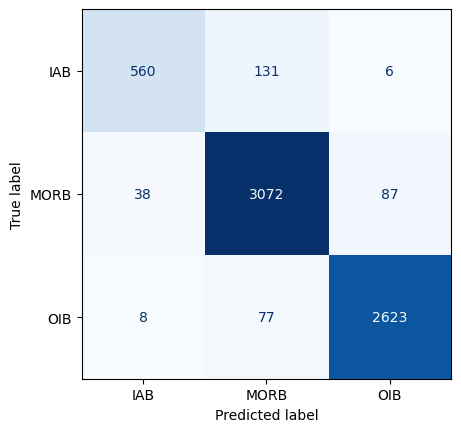

In [11]:
## Build a logistic regression classifier. 
## Remember to standardize the data using StandardScaler
## Hint: using make_pipeline and StandardScaler
model_linear = make_pipeline(StandardScaler(),LogisticRegression(solver="liblinear"))

## train the model
model_linear.fit(X_train,y_train)

## predict on the test set
y_pred = model_linear.predict(X_test)

## evaluate the model
accuracy = accuracy_score(y_test,y_pred)
print(f"{accuracy = }")

## plot confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d', colorbar=False);


## Build a SVM classifier

Let's try to use the more advanced machine learning models SVM to see if they can improve the accuracy.

First, let's try a linear kernel SVM, which is similar to the logistic regression classifier we built above. 

Review the previous lectures on SVM and how to build a SVM classifier using `sklearn`.



accuracy = 0.9528930627082702


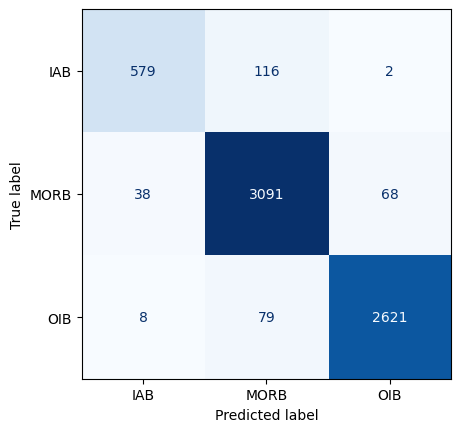

In [12]:
## Build a SVM classifier using kernel="linear"
## Remember to standardize the data using StandardScaler
## Hint: using make_pipeline and StandardScaler
model_svm = make_pipeline(StandardScaler(),SVC(kernel="linear"))

## train the model
model_svm.fit(X_train,y_train)

## predict on the test set
y_pred = model_svm.predict(X_test)

## evaluate the model
accuracy = accuracy_score(y_test,y_pred)
print(f"{accuracy = }")

## plot confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d', colorbar=False);

As we dicussed in class, the advantage of SVM is that it can handle non-linear decision boundaries. Let's try a RBF kernel SVM.

The RBF kernel SVM is more computationally expensive than the linear kernel SVM, but it can handle non-linear decision boundaries.

The gamma parameter controls the smoothness of the decision boundary. A large gamma value will create a more complex decision boundary, while a small gamma value will create a simpler decision boundary.

First build a SVM classifier using a default gamma value of 0.1.

Then try a different gamma value and see if you can find a better model. 

Report the best gamma value and the accuracy of the model.


accuracy = 0.9792487125113601


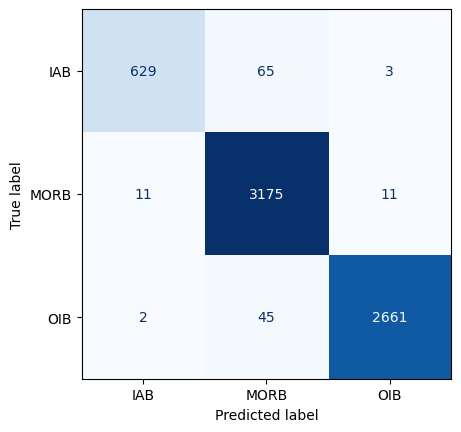

In [13]:
## Build a SVM classifier using SVC(kernel="rbf",gamma=0.1)
## Remember to standardize the data using StandardScaler
## Hint: using make_pipeline and StandardScaler
model_svm = make_pipeline(StandardScaler(),SVC(kernel="rbf",gamma=0.1))

## train the model
model_svm.fit(X_train,y_train)

## predict on the test set
y_pred = model_svm.predict(X_test)

## evaluate the model
accuracy = accuracy_score(y_test,y_pred)
print(f"{accuracy = }")

## plot confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d', colorbar=False);

## Build a decision tree classifier

Review the previous lectures on decision tree and how to build a decision tree classifier using `sklearn`.

Similar to the gamma parameter in SVM, the `max_depth` parameter in decision tree can also affect the complexity of the model.

The default setting is `max_depth=None` which means it will keep going and going until the leafs of the tree contain a single category. 

First, let's build a decision tree classifier with the default setting.

Then try different `max_depth` values and see if you can find a better model.

Report the best `max_depth` value and the accuracy of the model.

accuracy = 0.965010602847622


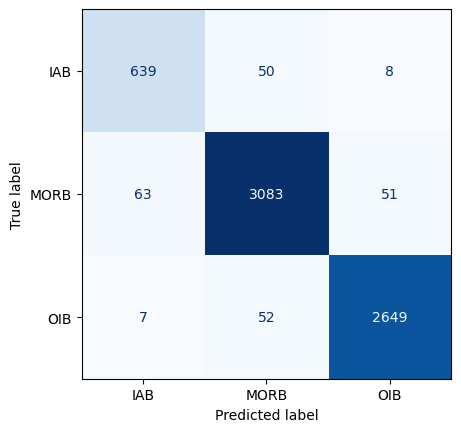

In [14]:
## Build a decision tree classifier with default setting DecisionTreeClassifier(max_depth=None)
model_tree = DecisionTreeClassifier(max_depth=None)

## train the model
model_tree.fit(X_train,y_train)

## predict on the test set
y_pred = model_tree.predict(X_test)

## evaluate the model
accuracy = accuracy_score(y_test,y_pred)
print(f"{accuracy = }")

## plot confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d', colorbar=False);

As we discussed in class, the decision tree classifier is a white box model, which means we can understand the importance of each feature in the decision making process.

In [15]:
## print the most important features
feature_importances = model_tree.feature_importances_
feature_df = pd.DataFrame({'feature':X_columns,'importance':feature_importances})
feature_df = feature_df.sort_values(by='importance',ascending=False)
feature_df.head(10)

,feature,importance
17,TiO2,0.463511
3,MgO,0.136978
35,Al2O3,0.085395
28,Na2O,0.059288
26,Sr,0.053626
4,SiO2,0.038245
29,Zr,0.022979
21,Fe2O3,0.017267
24,Ni,0.015391
7,Nb,0.015360


How does the accuracy of the decision tree based on larger dataset from Doucet et al. (2022) compare to that using the smaller dataset from Vermeesch (2006)? Write your answer in the markdown cell below.

What similarities and differences are there between the importance of different data fields (feature importance) between the decision tree built on the Vermeesch (2006) data compilation vs that built on the Doucet et al. (2022) data compilation?

## Applying the model trained on Doucet et al. (2022) dataset to the Vermeesch (2006) dataset

The goal of machine learning is to generalize the model to new data. Here we will apply the decision tree classifier trained on the Doucet et al. (2022) dataset to the Vermeesch (2006) dataset to see how well the model can be applied to new data.

Let's apply the linear model, SVM, and decision tree classifier to the Vermeesch (2006) dataset and evaluate their accuracy.

Please note that you would need to preprocess the Vermeesch (2006) dataset in the same way as the Doucet et al. (2022) dataset.


Logistic regression accuracy: 0.766
SVM accuracy: 0.659
Decision tree accuracy: 0.680


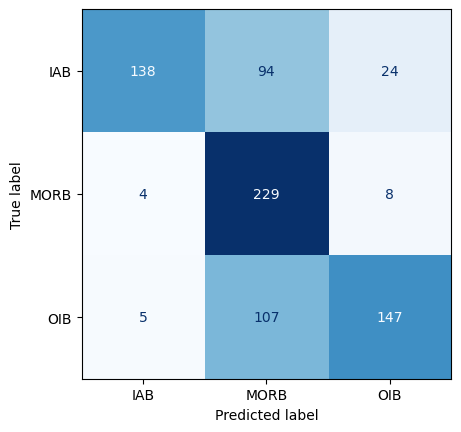

In [16]:
## Preprocess the Vermeesch (2006) dataset
## Split the data into features (X) and target (y)
X = Vermeesch_data.drop('type',axis=1)
X = X[X_columns] ## keep column in the same order as Doucet et al. (2022) dataset
y = Vermeesch_data['type']
y = le.transform(y) ## reuse the label encoder we defined earlier

## Impute missing values using median imputation 
X = imputer.transform(X) ## use the same imputer we defined earlier

## Apply the linear model and evaluate the accuracy
y_pred = model_linear.predict(X)
accuracy = accuracy_score(y,y_pred)
print(f"Logistic regression accuracy: {accuracy:.3f}")

## Apply the SVM model and evaluate the accuracy
y_pred = model_svm.predict(X)
accuracy = accuracy_score(y,y_pred)
print(f"SVM accuracy: {accuracy:.3f}")

## Apply the decision tree model and evaluate the accuracy
y_pred = model_tree.predict(X)
accuracy = accuracy_score(y,y_pred)
print(f"Decision tree accuracy: {accuracy:.3f}")

## plot confusion matrix
conf_matrix = confusion_matrix(y,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d', colorbar=False);

<!-- Comment on how well these models perform on the Vermeesch (2006) dataset. Why do you think the models perform better or worse on the Vermeesch (2006) dataset? -->
Based on the accuracy, please comment on the following questions:

- How does the accuracy of models trained on Doucet et al. (2022) dataset compare to the model trained on Vermeesch (2006) dataset?
Recall the accuracy you get in previous class using the model trained on Vermeesch (2006) dataset.

- Among these models, which one performs the best on the Doucet et al. (2022) dataset and which one performane the worst? 
Similar question for the Vermeesch (2006) dataset. Are the best and worst models the same or totally different?

- What are the possible reasons for the difference in accuracy?  What does this imply for the predictive power of machine learning models? Hint: think about model fitting and generalization.
